## Prediction using Unsupervised ML

### 1) Importing the required libraries and loading the dataset .


In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [4]:
# Load the iris dataset

iris = load_iris()

data = pd.DataFrame(iris.data, columns = iris.feature_names)

In [5]:
# Display the iris dataset

display(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## Let's take a look at the dataset.



In [6]:
# Displaying the first few rows of the dataset

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### We can see that the dataset consists of four features - sepal length, sepal width, petal length, and petal width

### 2) To find the optimum number of clusters,we will use the Elbow method. in this method we plot the within_cluster sum of squares(WCSS) against the number of clusters. WCSS is the sum of squared distances between each data point and its corresponding centroid. The point where the rate of decrease in WCSS slow down is considered as the optimum number of clusters.

In [7]:
# Finding the optimum number of cluster using the Elbow method

x = data.iloc[:, [0, 1, 2, 3]].values
wcss = []   #within cluster sum of squares

In [8]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state =0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

## Plotting the results onto a line graph to observe 'The elbow'

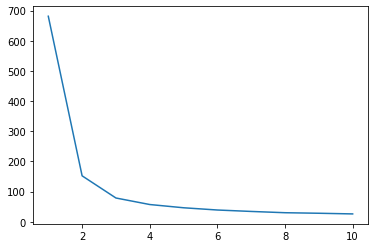

In [9]:
plt.plot(range(1, 11), wcss)

Text(0.5, 1.0, 'The elbow method')

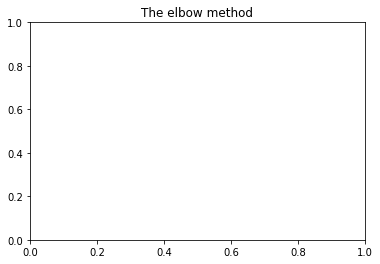

In [10]:
plt.title('The elbow method')

Text(0.5, 0, 'Number of cluters')

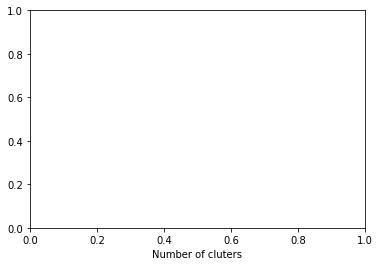

In [11]:
plt.xlabel('Number of cluters')

Text(0, 0.5, 'wcss')

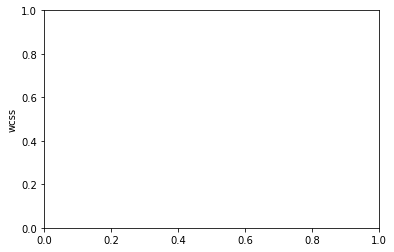

In [12]:
plt.ylabel('wcss')

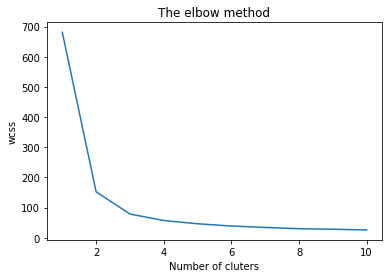

In [14]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of cluters')
plt.ylabel('wcss')
plt.show()

## From the above plot, we can see that the rate of decrease in WCSS slows down after the number of clusters is 3. Therefore , we can conclude that the optimum number of clusters for this dataset is 3.

## Let's apply the K-Means clustering algorithm with 3 clusters and visualize the result.

In [15]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init =10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

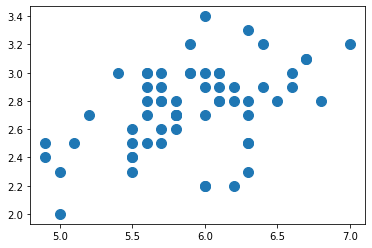

In [16]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100)